In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata
import scanorama

# sittings
sns.set_style("ticks",{'axes.grid' : True})
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)

# Load the data
Read the h5ad file we saved in the preprocessing and integration

In [2]:
# Read the data into an AnnData object
adata = sc.read_h5ad("integrated_scanorama.h5ad")

adata

AnnData object with n_obs × n_vars = 157422 × 16975
    obs: 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    uns: 'Sample_colors', 'leiden', 'leiden_colors', 'neighbors', 'umap'
    obsm: 'Scanorama', 'X_scanorama', 'X_umap'
    obsp: 'connectivities', 'distances'

# Clustering the neighborhood graph using leiden algorithm

running Leiden clustering
    finished: found 82 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:26)


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


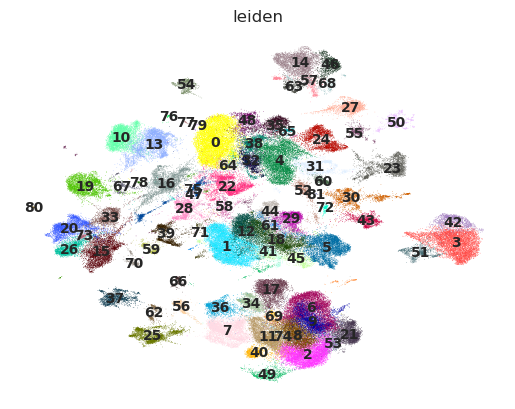

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


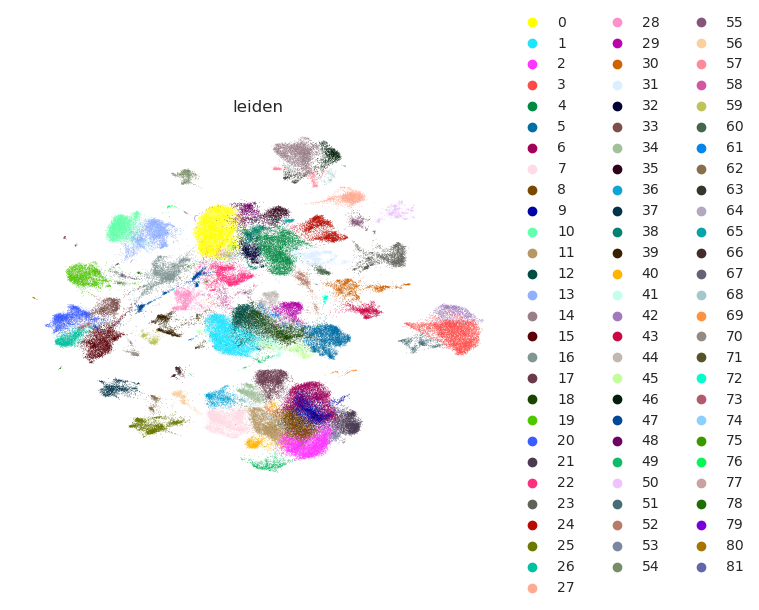

In [3]:
# Run leiden clustering
sc.tl.leiden(adata, resolution = 2)

# Plot the clusters using umap
sc.pl.umap(adata, color='leiden', frameon= False, legend_loc="on data")
sc.pl.umap(adata, color='leiden', frameon= False)

# Find the markers to label cell types

In [4]:
# Rank the gene groups
sc.tl.rank_genes_groups(adata, 'leiden')

# Plot the genes identifies each cluster from the rest
# sc.pl.rank_genes_groups(adata, n_genes=10)

ranking genes


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:399: P

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:02:10)


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:399: P

In [5]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

group      names      scores  logfoldchanges     pvals  pvals_adj
0           0       MUC1  273.494843        4.242620  0.000000   0.000000
1           0       ELF3  253.571106        3.799788  0.000000   0.000000
2           0       TFF1  229.772629        6.594072  0.000000   0.000000
3           0      IFI27  218.927567        3.395252  0.000000   0.000000
4           0    CEACAM6  217.429550        4.358153  0.000000   0.000000
...       ...        ...         ...             ...       ...        ...
1376354    81       CHD8    2.874464        1.112749  0.023827   0.049338
1376355    81    SLC25A4    2.870729        1.952753  0.023963   0.049613
1376356    81  TNFRSF10A    2.869880        2.011756  0.023992   0.049666
1376357    81      ABCC3    2.869110        1.526507  0.024017   0.049712
1376358    81       XIAP    2.866140        1.632285  0.024121   0.049916

[244929 rows x 6 columns]

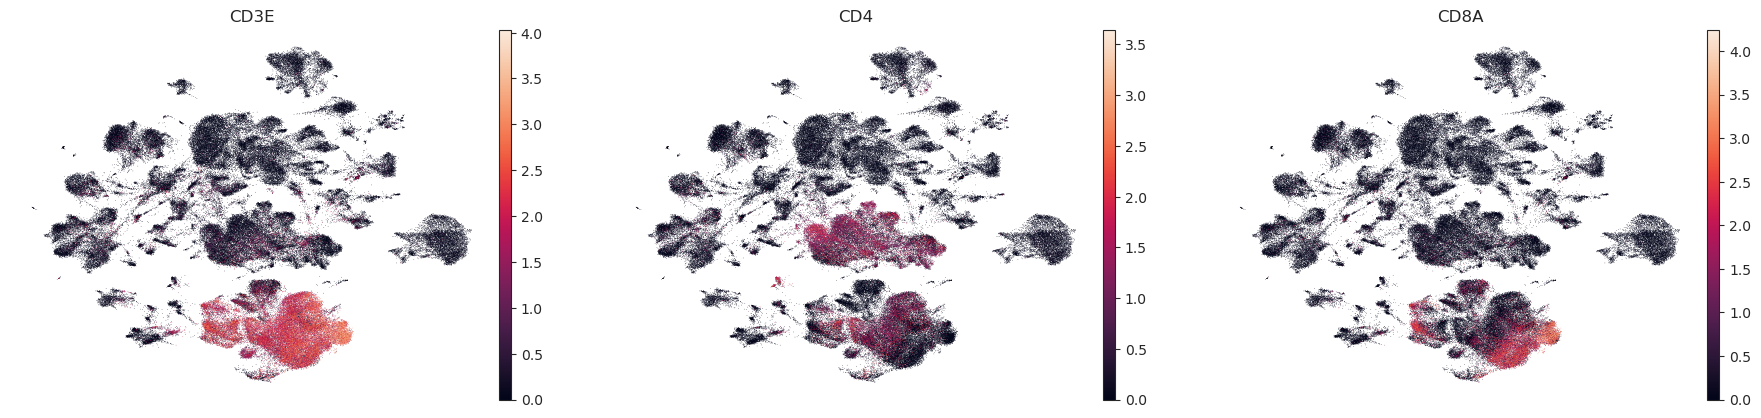

In [6]:
# T/NK
sc.pl.umap(adata, color = ['CD3E', 'CD4', 'CD8A'], frameon = False)

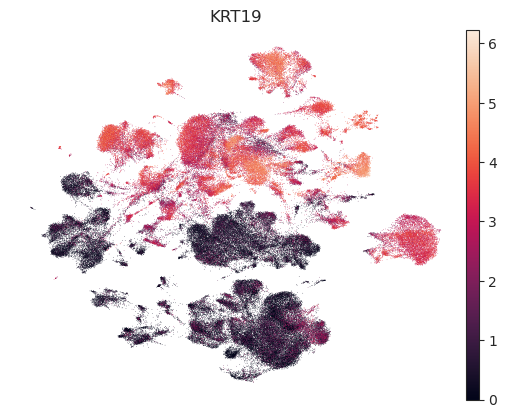

In [7]:
# epithelial
sc.pl.umap(adata, color = ['KRT19'], frameon = False)

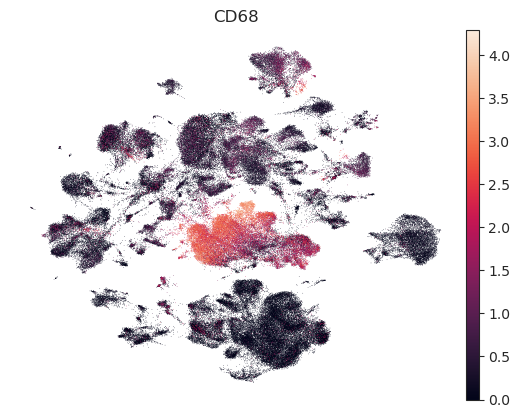

In [8]:
# endothelial
sc.pl.umap(adata, color = ['CD68'], frameon = False)

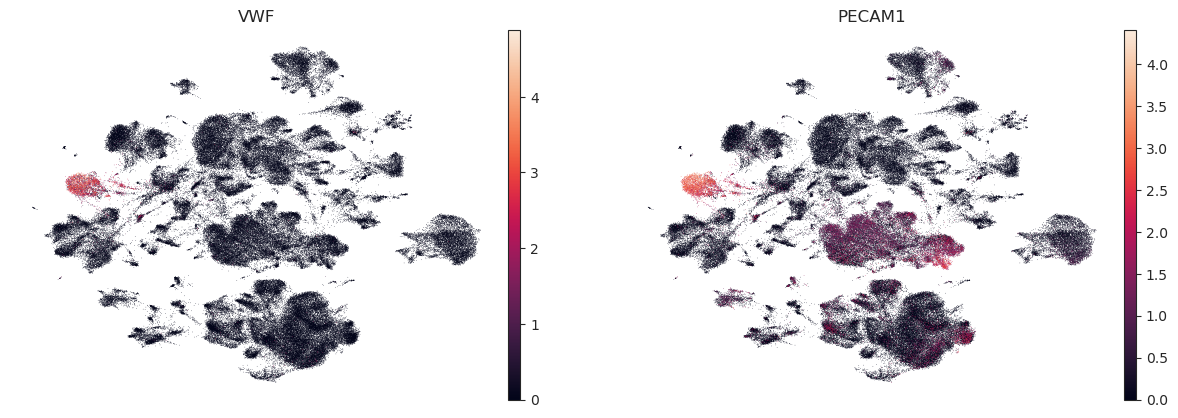

In [9]:
# myeloid
sc.pl.umap(adata, color = ['VWF', 'PECAM1'], frameon = False)

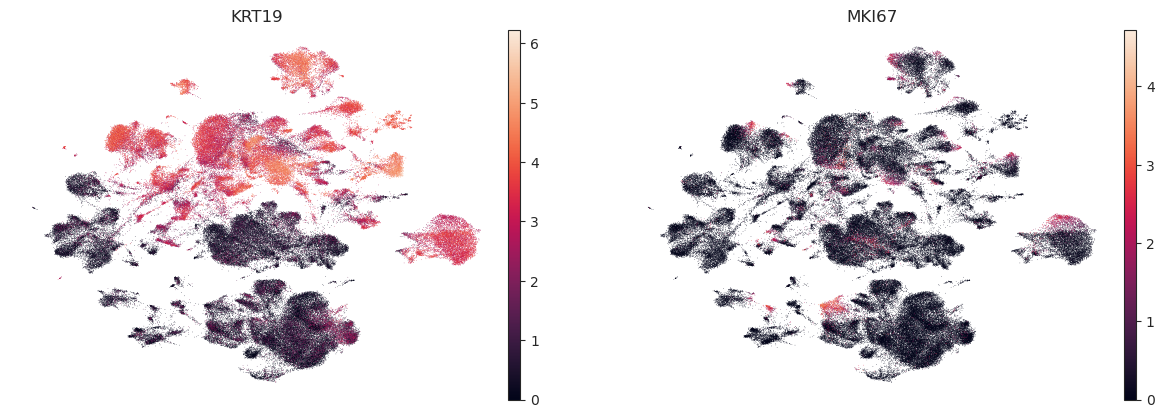

In [10]:
# proliferating epithelial
sc.pl.umap(adata, color = ['KRT19', 'MKI67'], frameon = False)

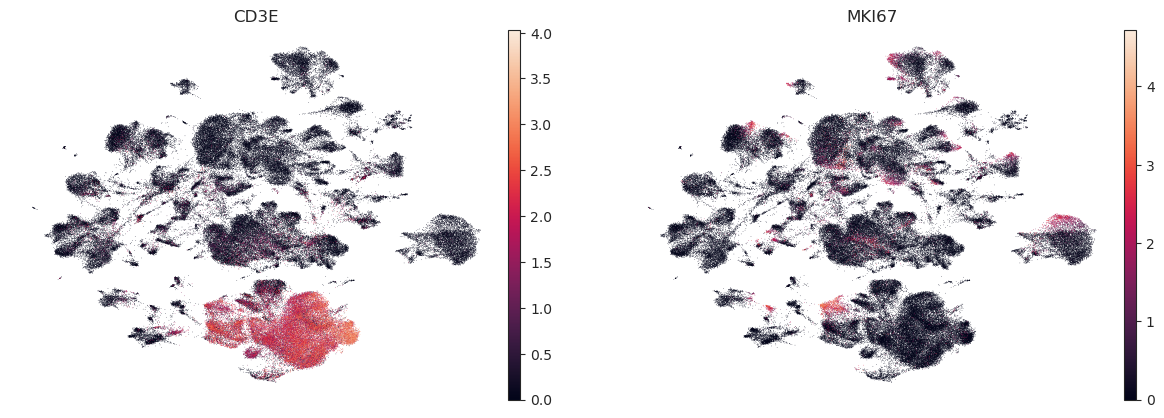

In [11]:
# proliferating lymphoid
sc.pl.umap(adata, color = ['CD3E', 'MKI67'], frameon = False)

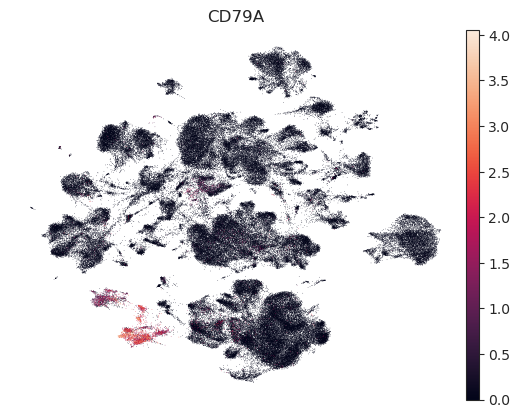

In [12]:
# B/plasma
sc.pl.umap(adata, color = ['CD79A'], frameon = False)

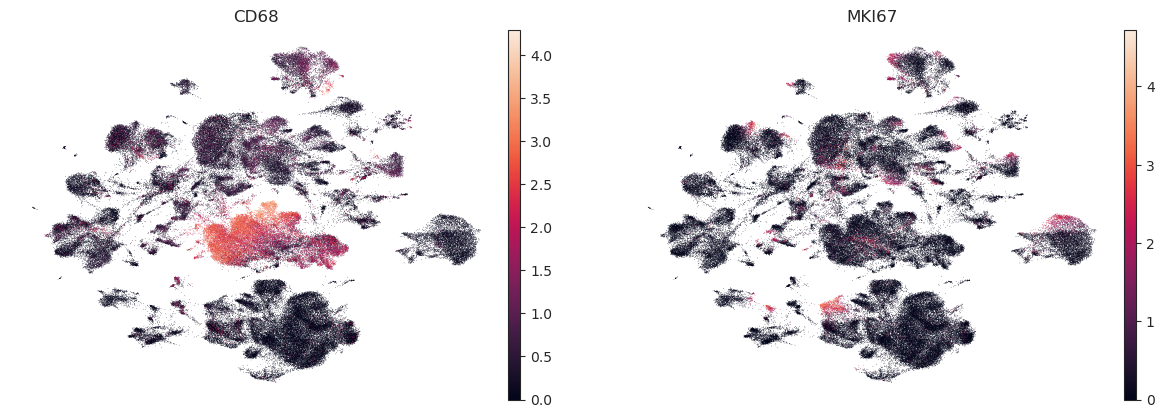

In [13]:
# proliferating myeloid
sc.pl.umap(adata, color = ['CD68', 'MKI67'], frameon = False)

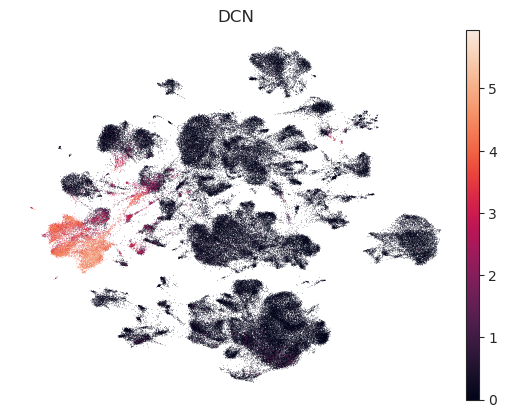

In [14]:
# mesenchyme
sc.pl.umap(adata, color = ['DCN'], frameon = False)

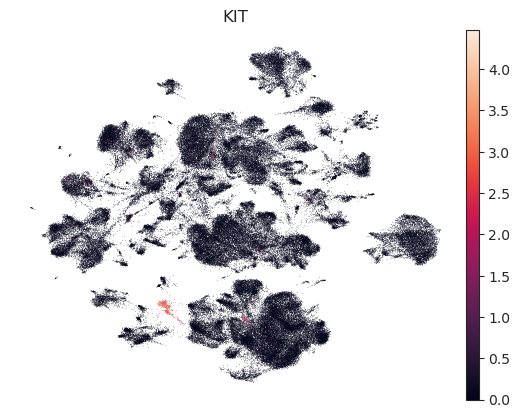

In [15]:
# mast
sc.pl.umap(adata, color = ['KIT'], frameon = False)

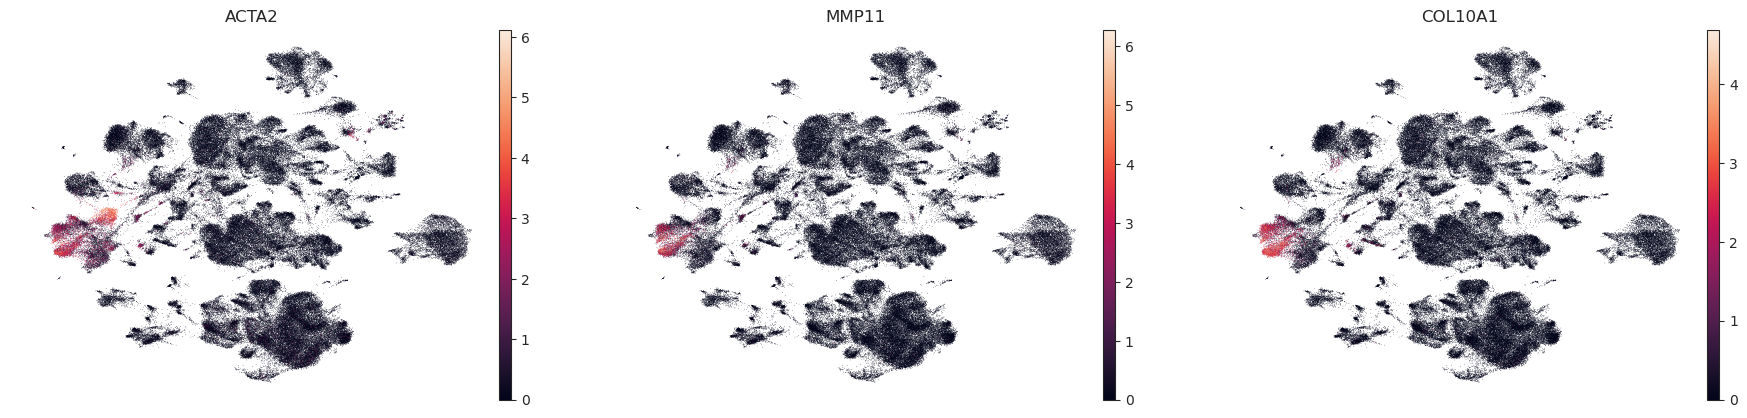

In [16]:
# myCAF
sc.pl.umap(adata, color = ['ACTA2', 'MMP11', 'COL10A1'], frameon = False)

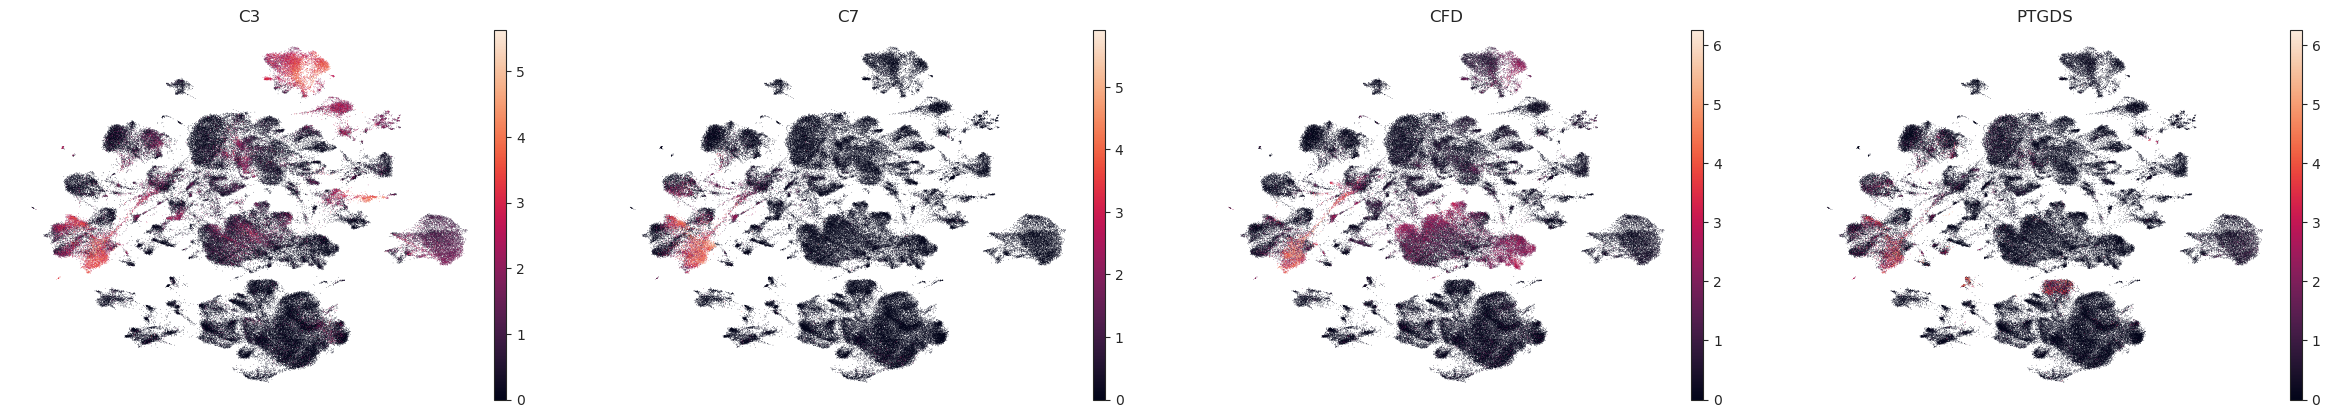

In [17]:
# iCAF
sc.pl.umap(adata, color = ['C3', 'C7', 'CFD', 'PTGDS'], frameon = False)

In [19]:
# # Print the dict to fill
# for x in range(0,16): print(f'"{x}":"",')

# Identify the cell type for each cluster
cell_type = {"0":"epithelial",
"1":"endothelial",
"2":"T/NK",
"3":"epithelial",
"4":"epithelial",
"5":"endothelial",
"6":"T/NK",
"7":"T/NK",
"8":"T/NK",
"9":"T/NK",
"10":"epithelial",
"11":"T/NK",
"12":"endothelial",
"13":"epithelial",
"14":"epithelial",
"15":"CAFs",
"16":"epithelial",
"17":"T/NK",
"18":"endothelial",
"19":"myeloid",
"20":"CAFs",
"21":"T/NK",
"22":"epithelial",
"23":"epithelial",
"24":"epithelial",
"25":"B/plasma",
"26":"CAFs",
"27":"epithelial",
"28":"epithelial",
"29":"endothelial",
"30":"epithelial",
"31":"epithelial",
"32":"epithelial",
"33":"CAFs",
"34":"T/NK",
"35":"prolif epithelial",
"36":"prolif lymphoid",
"37":"B/plasma",
"38":"epithelial",
"39":"epithelial",
"40":"T/NK",
"41":"endothelial",
"42":"prolif epithelial",
"43":"epithelial",
"44":"endothelial",
"45":"endothelial",
"46":"epithelial",
"47":"epithelial",
"48":"epithelial",
"49":"T/NK",
"50":"epithelial",
"51":"epithelial",
"52":"epithelial",
"53":"T/NK",
"54":"epithelial",
"55":"epithelial",
"56":"mast",
"57":"epithelial",
"58":"epithelial",
"59":"CAFs",
"60":"epithelial",
"61":"endothelial",
"62":"B/plasma",
"63":"epithelial",
"64":"prolif epithelial",
"65":"epithelial",
"66":"endothelial",
"67":"myeloid",
"68":"epithelial",
"69":"mast",
"70":"other",
"71":"endothelial",
"72":"other",
"73":"CAFs",
"74":"T/NK",
"75":"epithelial",
"76":"epithelial",
"77":"epithelial",
"78":"myeloid",
"79":"epithelial",
"80":"CAFs",
"81":"epithelial"}

In [20]:
# Mape the cell type to the clusters
adata.obs['cell type'] = adata.obs.leiden.map(cell_type)

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


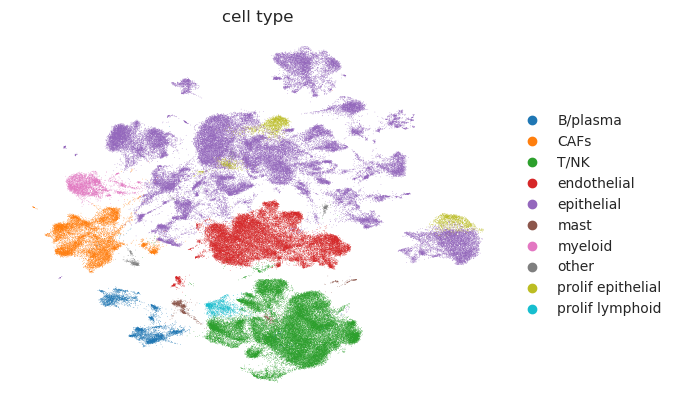

In [21]:
sc.pl.umap(adata, color = ['cell type'], frameon = False)

In [24]:
# Add the markers to the AnnData object
adata.uns['markers'] = markers
adata

AnnData object with n_obs × n_vars = 157422 × 16975
    obs: 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'cell type'
    uns: 'Sample_colors', 'leiden', 'leiden_colors', 'neighbors', 'umap', 'rank_genes_groups', 'cell type_colors', 'markers'
    obsm: 'Scanorama', 'X_scanorama', 'X_umap'
    obsp: 'connectivities', 'distances'

# Save the AnnData object in h5ad format

In [25]:
adata.write_h5ad('labeled_scanorama.h5ad')